# In this part I have considered mutiple variants of questions and also their visual representations. #The questions I have used have answers starting from a simple single value extraction to multi dimentation representations.

In [2]:
install.packages('dplyr', repos='https://cran.r-project.org/')
install.packages('sqldf', repos='https://cran.r-project.org/')
install.packages('ggplot2', repos='https://cran.r-project.org/')

Installing package into 'C:/Users/User/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpKcBhAK\downloaded_packages


Installing package into 'C:/Users/User/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'sqldf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpKcBhAK\downloaded_packages


Installing package into 'C:/Users/User/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpKcBhAK\downloaded_packages


1. Installing required packages for querying data and to represent it.

In [3]:
library(dplyr)
library(sqldf)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'sqldf' was built under R version 3.3.3"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.3.3"Loading required package: proto
Could not load tcltk.  Will use slower R code instead.
Loading required package: RSQLite
Warning message:
"package 'RSQLite' was built under R version 3.3.3"Warning message:
"package 'ggplot2' was built under R version 3.3.3"

1. Adding packages to Library.

In [4]:
allData <- read.csv("Gaming_Jobs_Broadband.csv")

1. Fetching all the data from the data set csv file

In [5]:
requiredData <- select(allData,sex,marital,date1a,date2a,act87a,act87b,party,race,bbsmart1,bbsmart2,bbsmart3a,bbsmart3b,bbsmart4,date1a,date4a,date4b,stud,snsjob1a,snsjob1b,snsjob1c,snsjob2a,snsjob2b,age,zipcode,educ2,inc)

1. Querying for pnly the columns required for the Question and Answers from the complete dataset.

In [6]:
write.csv(requiredData, file = "QAData.csv", row.names=FALSE)

1. Write the required DataFrame to CSV thus avoiding any references to the original data.
2. This csv file will be used to fetch relevant data for answering questions.

Question 1:
-> Get the percentage of users who had broadband connection and want to have the connection but find it too expensive.

In [7]:
Q1DataSet <- select(requiredData,bbsmart1,bbsmart2,bbsmart3a,bbsmart4)
head(Q1DataSet)

bbsmart1,bbsmart2,bbsmart3a,bbsmart4
NA,NA,NA,NA
8,2,8,NA
2,2,2,NA
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA


1. This is a simple single value extraction question.
2. We need to identify the broadband users who have disconnected as it is expensive.
3. 'bbsmart1' is used to fetch the users who had broadband connection before
4. 'bbsmart2' is used to refine the users who want still want to have the broadband connection
5. 'bbsmart3a' and 'bbsmart4' are used to further refine the users to who find it expensive

In [8]:
Q1DataSet <- Q1DataSet[rowSums(is.na(Q1DataSet))!=4,]
head(Q1DataSet)

,bbsmart1,bbsmart2,bbsmart3a,bbsmart4
2,8,2,8,NA
3,2,2,2,NA
7,2,2,2,6
8,2,2,2,NA
10,2,2,2,NA
17,2,2,2,6


1. The data obtained is not clean and we need to remove the rows which are of no use.
2. We are removing the rows which have all the values as NA.

In [9]:
A1_TotalPercentageOfUsersCancelled <- nrow(filter(Q1DataSet, bbsmart1 == 1, bbsmart2 == 1, bbsmart4 == 1 | bbsmart3a == 1))/nrow(filter(Q1DataSet, bbsmart1 == 1, bbsmart2 == 1))*100
A1_TotalPercentageOfUsersCancelled

[1] 62.5

1. After cleaning the data, the percentage of users who want to have a broadband connection but find it expensive is calculated by using row filters and appropriate conditions.
2. Thus the data set can be used to get a direct answer to a question.

Question 2:
-> Find the gender split of the online job seekers who have lost their jobs due to inappropriate content on their social media account.

In [10]:
Q2DataFrame <- read.csv.sql("QAData.csv","Select (CAST((SELECT COUNT(*) FROM file WHERE 
                                                   (snsjob1a = 1 OR snsjob1b = 1 OR snsjob1c = 1) 
                                                    AND snsjob2b=1 AND sex == 1) AS FLOAT)/CAST(COUNT(*) AS FLOAT)*100) AS MALE_STUDENTS,
                                                 (CAST((SELECT COUNT(*) FROM file WHERE 
                                                   (snsjob1a = 1 OR snsjob1b = 1 OR snsjob1c = 1) 
                                                    AND snsjob2b=1 AND sex == 2) AS FLOAT)/CAST(COUNT(*) AS FLOAT)*100) AS FEMALE_STUDENTS
                                          FROM file WHERE (snsjob1a = 1 OR snsjob1b = 1 OR snsjob1c = 1) AND snsjob2b=1", 
                            sep = ",")
Q2DataFrame <- t(Q2DataFrame)
colnames(Q2DataFrame) <- c("PERCENT")
Q2DataFrame <- cbind(STUDENT = rownames(Q2DataFrame),Q2DataFrame)
rownames(Q2DataFrame) <- c()
Q2DataFrame <- as.data.frame(Q2DataFrame)
head(Q2DataFrame)

STUDENT,PERCENT
MALE_STUDENTS,44.4444444444444
FEMALE_STUDENTS,55.5555555555556


1. Here I have used read.csv.sql to directly read from the stored csv.
2. The data is queried based on the following fields:
    i.  'snsjob1a', 'snsjob1b' and 'snsjob1c' are used to identify the users who apply on social media for jobs
    ii. 'snsjob2b' is used to filter the records based on who has lost the job because of their content on social media
3. I have used subqueries to calculate the percentage split for both the genders

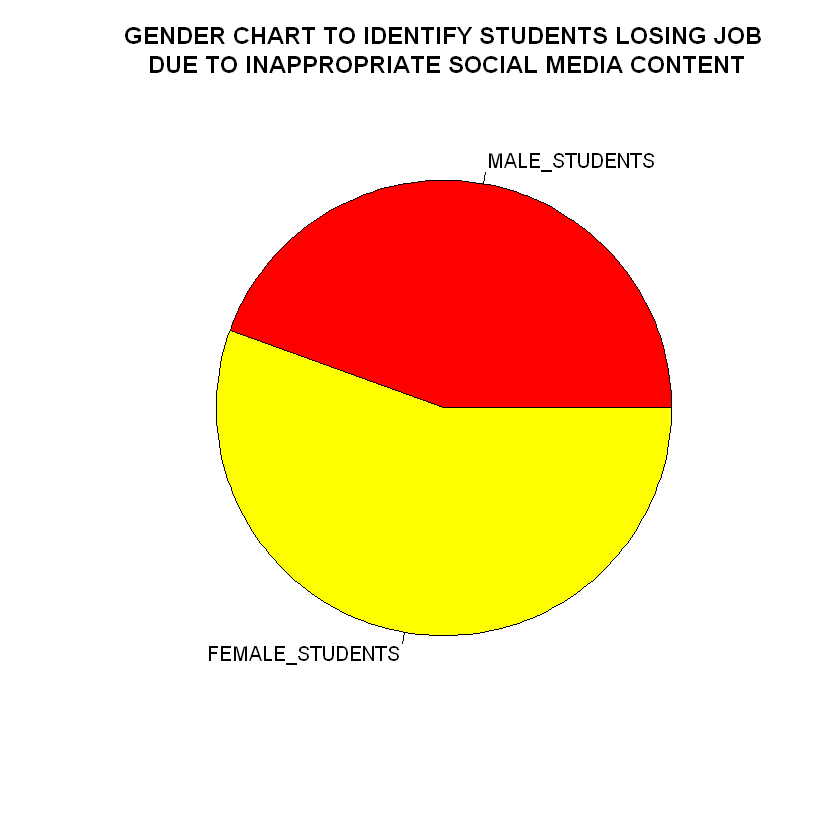

In [11]:
pie(as.numeric(as.character(Q2DataFrame$PERCENT)), labels = as.character(Q2DataFrame$STUDENT), col = c("red", "yellow", "blue"),
main="GENDER CHART TO IDENTIFY STUDENTS LOSING JOB\n DUE TO INAPPROPRIATE SOCIAL MEDIA CONTENT")

1. The data is represented using a simple pie chart distinguishing the female and male user percentages.

Question 3:
-> Find the number of online dating users. Plot the count against their gender and marital status. 

In [12]:
Q3DataFrame <- read.csv.sql("QAData.csv","Select (CASE 
                                                    WHEN sex=1 THEN 'MALE' 
                                                    WHEN sex=2 THEN 'FEMALE' END
                                                 ) AS GENDER, 
                                                 (CASE
                                                    WHEN marital=1 THEN 'Married'
                                                    WHEN marital=2 THEN 'Living with a partner'
                                                    WHEN marital=3 THEN 'Divorced'
                                                    WHEN marital=4 THEN 'Separated'
                                                    WHEN marital=5 THEN 'Widowed'
                                                    WHEN marital=6 THEN 'Never been married' END
                                                 ) AS MARITAL, 
                                                  count(*) AS USERS 
                                         From file where (date1a=1 OR date2a=1) AND marital!=8 AND marital!=9 AND marital!='' Group by sex, marital")
head(Q3DataFrame)

GENDER,MARITAL,USERS
MALE,Married,35
MALE,Living with a partner,12
MALE,Divorced,21
MALE,Separated,5
MALE,Widowed,3
MALE,Never been married,72


1. Here the records are queried from csv file and in the query conditions like 'marital!=8' have been put to avoid any useless or unclean data. 
2. Below are the fields used for this question:
    i.   'Sex' used to identify the gender of the user
    ii.  'Marital' used to identify the marital status of the user
    iii. 'date1a' and 'date2a' are used to identify the online dating users.
3. Group By clause has been used to get a well structured dataframe.

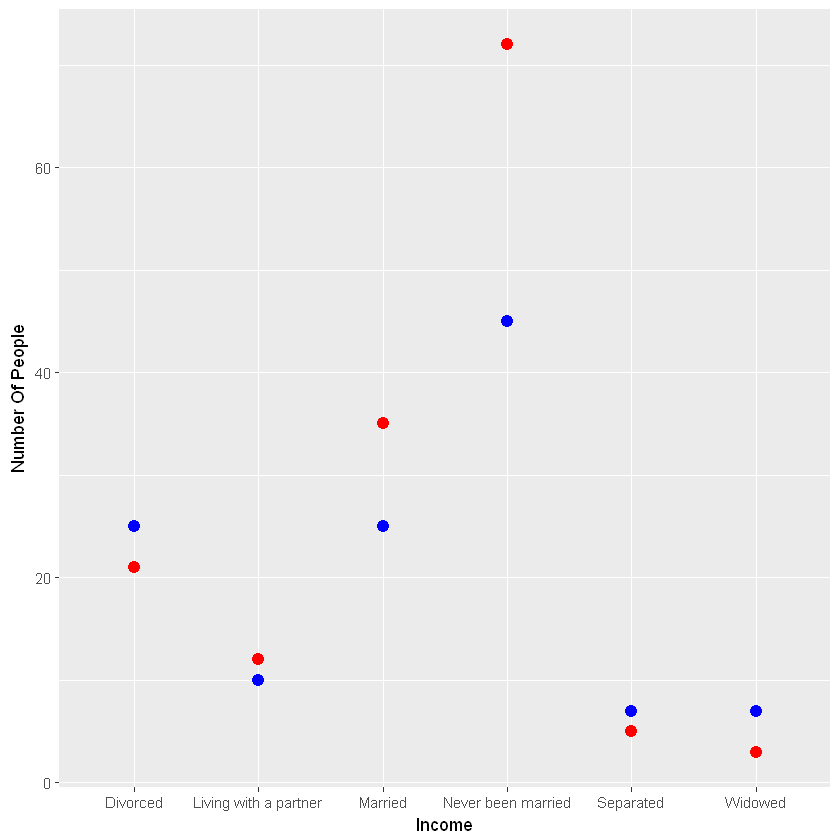

In [13]:
PointGraph <- ggplot(Q3DataFrame, aes(x=MARITAL, y=USERS,group=GENDER)) + 
  geom_point(data = subset(Q3DataFrame,GENDER=='MALE'), aes(x = MARITAL, y = USERS, color = "MALE"), colour = "red", size = 3) +
  geom_point(data = subset(Q3DataFrame,GENDER=='FEMALE'), aes(x = MARITAL, y = USERS, color = "FEMALE"), colour = "blue", size = 3)  +
  xlab('Income') +
  ylab('Number Of People')

show(PointGraph)

1. The data is used to plot a point graph with X axis as the marital status and Y axis as the number of users. Red points represent male users and blue points represent female users.
2. The graph is plotted over 3 columns and gives us a definitive understanding of the online dating users, with unmarried males using it the most.

Question 4: 
-> Which age group is using the social media the most.

In [14]:
Q4DataFrame <- read.csv.sql("QAData.csv","Select SUM(CASE WHEN age <= 10 THEN 1 ELSE 0 END) AS COUNT_1_10,
                                                 SUM(CASE WHEN age > 10 AND age <= 20 THEN 1 ELSE 0 END) AS COUNT_11_20,
                                                 SUM(CASE WHEN age > 20 AND age <= 30 THEN 1 ELSE 0 END) AS COUNT_21_30,
                                                 SUM(CASE WHEN age > 30 AND age <= 40 THEN 1 ELSE 0 END) AS COUNT_31_40,
                                                 SUM(CASE WHEN age > 40 AND age <= 50 THEN 1 ELSE 0 END) AS COUNT_41_50,
                                                 SUM(CASE WHEN age > 50 AND age <= 60 THEN 1 ELSE 0 END) AS COUNT_51_60,
                                                 SUM(CASE WHEN age > 60 AND age <= 70 THEN 1 ELSE 0 END) AS COUNT_61_70,
                                                 SUM(CASE WHEN age > 70 AND age <= 80 THEN 1 ELSE 0 END) AS COUNT_71_80,
                                                 SUM(CASE WHEN age > 80 AND age <= 90 THEN 1 ELSE 0 END) AS COUNT_81_90,
                                                 SUM(CASE WHEN age > 90 THEN 1 ELSE 0 END) AS COUNT_91_100Plus
                                         FROM file WHERE act87a=1 OR act87b=1", sep = ",")
Q4DataFrame <- t(Q4DataFrame)
colnames(Q4DataFrame) <- c("COUNT")
Q4DataFrame <- cbind(AGE_RANGE = rownames(Q4DataFrame),Q4DataFrame)
rownames(Q4DataFrame) <- c()
Q4DataFrame <- as.data.frame(Q4DataFrame)
head(Q4DataFrame)

Warning message:
"closing unused connection 4 (QAData.csv)"

AGE_RANGE,COUNT
COUNT_1_10,0
COUNT_11_20,69
COUNT_21_30,241
COUNT_31_40,206
COUNT_41_50,209
COUNT_51_60,213


1. Here the records are queried from csv file and in the query conditions have been well defined to avoid any useless or unclean data. 
2. The ages of the Survey members are split into age groups of 10 and in the query the count of the users falling in that age group is summed up.
3. Fields 'act87a' and 'act87a' are used to identify the social media/site users.
4. Modifications are done on the data retrieved to make is suitable for plotting

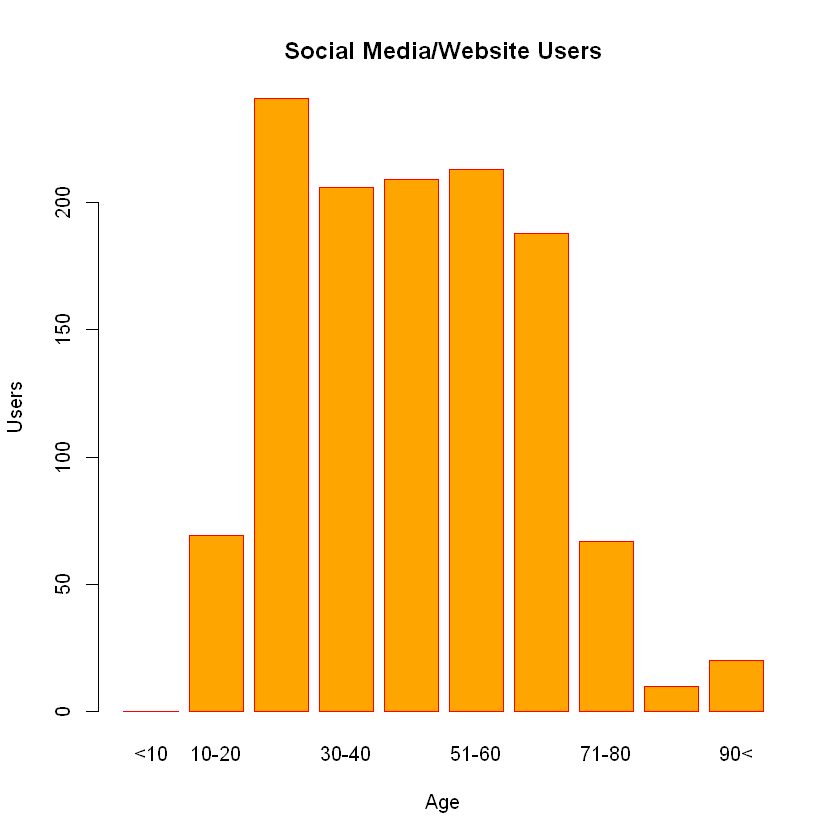

In [15]:
barplot(as.numeric(as.character(Q4DataFrame$COUNT)),names.arg = c("<10","10-20","20-30","30-40","41-50","51-60","61-70","71-80","81-90","90<"),xlab = "Age",ylab = "Users",col = "orange",
main = "Social Media/Website Users",border = "red")

1. Function 'barplot' is used to plot the number of the users against its age group. It can be observed that most of the social media/site users fall between the age of 20 to 70.

Question 5:
-> What is the income of people based on their education

In [16]:
Q5DataFrame <- read.csv.sql("QAData.csv","Select (CASE 
                                                 WHEN educ2=1 THEN 'No HS' 
                                                 WHEN educ2=2 THEN 'Incom HS' 
                                                 WHEN educ2=3 THEN 'HS' 
                                                 WHEN educ2=4 THEN 'College' 
                                                 WHEN educ2=5 THEN '2Yrs undergrad' 
                                                 WHEN educ2=6 THEN '4yrs undergrad' 
                                                 WHEN educ2=7 THEN 'Grad' 
                                                 WHEN educ2=8 THEN 'Postgrad' END
                                                 ) AS QUALIFICATION,
                                                 (CASE 
                                                     WHEN inc=1 THEN '0-10k'
                                                     WHEN inc=2 THEN '10-20k'
                                                     WHEN inc=3 THEN '20-30k'
                                                     WHEN inc=4 THEN '30-40k'
                                                     WHEN inc=5 THEN '40-50k'
                                                     WHEN inc=6 THEN '50k-75k' 
                                                     WHEN inc=7 THEN '75k-100k' 
                                                     WHEN inc=8 THEN '100k-150k' 
                                                     WHEN inc=9 THEN '150+' END
                                                 ) AS INCOME
                                         , COUNT(*) AS COUNT
                                         FROM file WHERE 
                                         educ2!='' AND educ2!=99 AND educ2!=98 AND inc!='' AND inc!=98 AND inc!=99 GROUP BY QUALIFICATION,INCOME ORDER BY educ2,inc", 
                            sep = ",")
head(Q5DataFrame)

Warning message:
"closing unused connection 4 (QAData.csv)"

QUALIFICATION,INCOME,COUNT
No HS,0-10k,19
No HS,10-20k,17
No HS,20-30k,8
No HS,30-40k,1
No HS,40-50k,3
No HS,50k-75k,2


1. We need to identiy the users with their educational backqround and their current income.
2. Fields 'educ2' and 'inc' are used to filter records based on education and income respectively.

Warning message:
"closing unused connection 6 (QAData.csv)"Warning message:
"closing unused connection 5 (QAData.csv)"

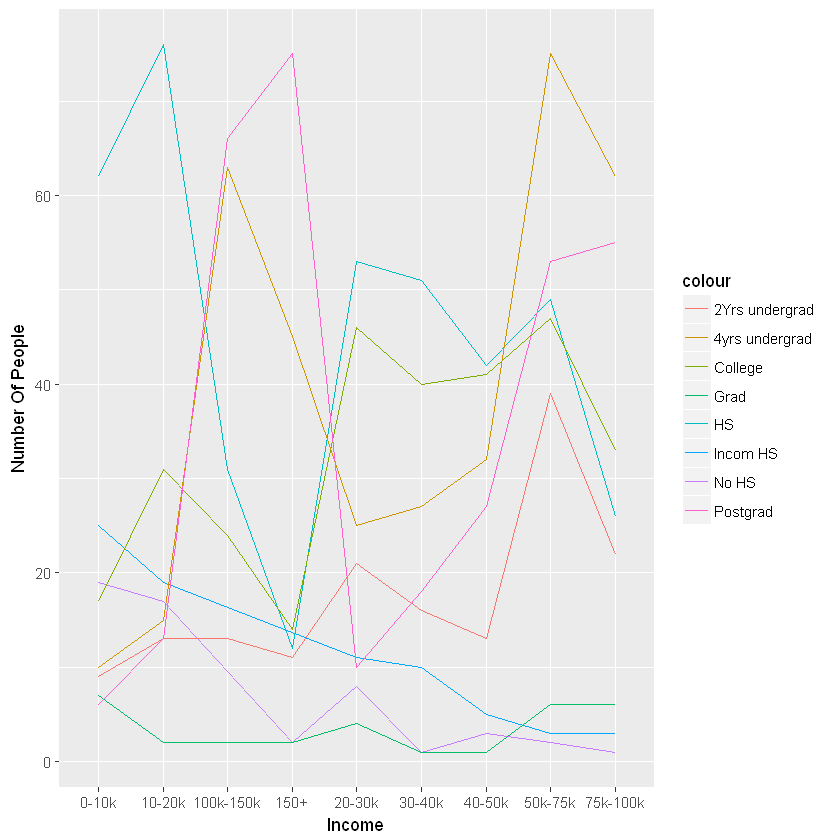

In [17]:
ggplot(Q5DataFrame, aes(x=INCOME, y=COUNT,group=QUALIFICATION)) + 
  geom_line(data = subset(Q5DataFrame,QUALIFICATION=='No HS'), aes(x = INCOME, y = COUNT, color = "No HS")) +
  geom_line(data = subset(Q5DataFrame,QUALIFICATION=='Incom HS'), aes(x = INCOME, y = COUNT, color = "Incom HS"))  +
  geom_line(data = subset(Q5DataFrame,QUALIFICATION=='HS'), aes(x = INCOME, y = COUNT, color = "HS"))  +
  geom_line(data = subset(Q5DataFrame,QUALIFICATION=='College'), aes(x = INCOME, y = COUNT, color = "College"))  +
  geom_line(data = subset(Q5DataFrame,QUALIFICATION=='2Yrs undergrad'), aes(x = INCOME, y = COUNT, color = "2Yrs undergrad"))  +
  geom_line(data = subset(Q5DataFrame,QUALIFICATION=='4yrs undergrad'), aes(x = INCOME, y = COUNT, color = "4yrs undergrad"))  +
  geom_line(data = subset(Q5DataFrame,QUALIFICATION=='Grad'), aes(x = INCOME, y = COUNT, color = "Grad"))  +
  geom_line(data = subset(Q5DataFrame,QUALIFICATION=='Postgrad'), aes(x = INCOME, y = COUNT, color = "Postgrad"))  +
  xlab('Income') +
  ylab('Number Of People')

1. A line graph is plotted using ggplot and geom_line.
2. Each colored line representing the education qualification, with X axis as the income range and Y axis as the number of members.
3. This graph is plotted for three columns and helps us to make an observation that higher the education better is the income.

Question 6:
-> I dentify supporters for Republican, democrat and independent parties. Plot the information based on the supporters gender and race.

In [18]:
Q6DataFrame <- read.csv.sql("QAData.csv","Select (CASE 
                                                    WHEN sex=1 THEN 'MALE' 
                                                    WHEN sex=2 THEN 'FEMALE' END
                                                 ) AS GENDER,
                                                 (CASE
                                                    WHEN party=1 THEN 'Repub'
                                                    WHEN party=2 THEN 'Democr'
                                                    WHEN party=3 THEN 'Indepen' END
                                                 )AS PARTY,
                                                 (CASE
                                                    WHEN race=1 THEN 'White'
                                                    WHEN race=2 THEN 'Black_AA'
                                                    WHEN race=3 THEN 'Asian_PI'
                                                    WHEN race=4 THEN 'Mixed'
                                                    WHEN race=5 THEN 'Native'
                                                    WHEN race=6 THEN 'Other' END
                                                 )AS RACE, COUNT(*) AS SUPPORTERS
                                          FROM file WHERE race!=8 AND race!=9 AND party IN (1,2,3) AND sex!='' GROUP BY GENDER, PARTY, RACE")
head(Q6DataFrame)

Warning message:
"closing unused connection 4 (QAData.csv)"

GENDER,PARTY,RACE,SUPPORTERS
FEMALE,Repub,White,213
FEMALE,Repub,Black_AA,10
FEMALE,Repub,Asian_PI,6
FEMALE,Repub,Mixed,1
FEMALE,Repub,Native,1
FEMALE,Repub,Other,2


1. Here the data is queried from the csv file and the appropriate conditions are added to avoid any useless and unclean data.
2. Below are the fields used for this question:
    i.   'Sex' is used to identify the gender of the supporter.
    ii.  'party' is used to identify the party supported by the user.
    iii. 'race' is used to identify the race of the user
3. Group By clause is used for better structuring of the data.

Warning message:
"closing unused connection 5 (QAData.csv)"

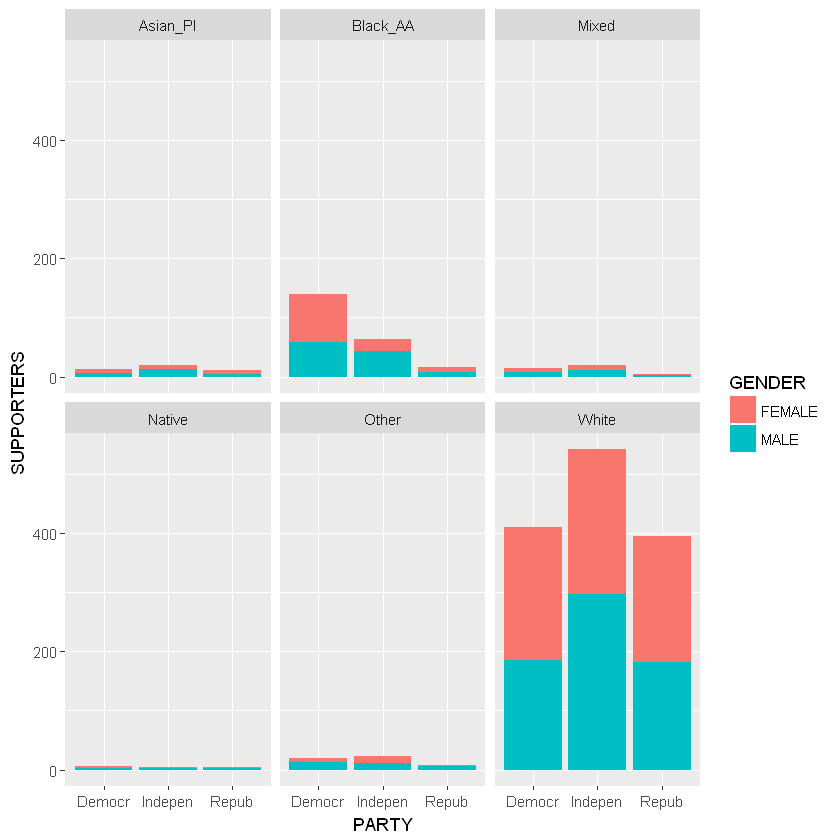

In [19]:
ggplot(Q6DataFrame, aes(x = PARTY, y = SUPPORTERS, fill = GENDER)) +
    geom_bar(position = "stack", stat = "identity") +
    facet_wrap( ~ RACE)

1. A merged bar chart is used to plot the data from the four columns.
2. Graph is plotted with X axis representing the party supported by the user and Y axis as the count of the supporters.
3. Each section representing the race of the supporters. 
4. Stacked bar helps to understand the gender split of the supporters.